## Пространство имен

In [6]:
# pip install opencv-python

In [7]:
import os                                      # ОС и ФС
import random                                  # Случайные числа
import re                                      # Регулярные выражения
import warnings                                # Обработка оповещений
import inspect                                 # Информация об объектах

import numpy as np                             # Массивы и вычисления
import pandas as pd                            # Таблицы и фильтры
import cv2                                     # OpenCV

import matplotlib.pyplot as plt                # Визуализация
import seaborn as sns
%matplotlib inline

## Часто используемый код (общего назначения)

In [8]:
def random_sample(df: pd.DataFrame, rows=3, columns=4):
    """Возвращает примеры изображений лиц
    в фигуре размерностью row*col по ссылкам
    адресов изображений из df.
    
    crop - вырезает лица изображений из фото
    negative - возвращает негатив изображения
    
    color:
        IMREAD_UNCHANGED - как есть
        IMREAD_GRAYSCALE - оттенки серого
        IMREAD_COLOR - 3-канальное цветное изображение BGR
        IMREAD_ANYDEPTH - 16-битное / 32-битное
        IMREAD_LOAD_GDAL - драйвер gdal для загрузки изображения
        IMREAD_REDUCED_COLOR_2 - BGR и уменьшить размер на 1/2
        IMREAD_IGNORE_ORIENTATION - не поворачивать с флагом ориентации EXIF
    """
    # Размер фигуры
    fig = plt.figure(figsize=(rows * 4, columns * 3))
    # Чтение изображений для фигуры в цикле
    for i in range(1, columns * rows + 1):
        x = np.random.choice(df.index)
        img = cv2.imread(df['addr'][x], cv2.IMREAD_GRAYSCALE)   
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        try:
            plt.title(f"Age:{df['age'][x]}, "
                      f"Sex:{df['sex'][x]}, "
                      f"Ras:{df['ras'][x]}"
                     )
        except BaseException:
            plt.title(f"LBL:{df['lbl'][x]}")
        plt.axis('off')
    plt.show()

In [60]:
def show_group(label: int, claster: list, meth: str) -> None:
    """Отображает группу аватаров по метке класса
    """
    group = main_df.loc[claster[label]]
    print(f'Выборка {meth}: {label}, Размер выборки: {len(group)}')

    return random_sample(group)

## Загрузка данных

In [10]:
def get_flat_frame(data_dir: str) -> pd.DataFrame:
    """Возвращает датасет с путями до файлов
    в папке (неразмеченные данные).
    """
    files = []
  
    for i in os.listdir(data_dir):
        files.append([data_dir+'/'+i])
        df = pd.DataFrame(files, columns=['addr'],
                          index=None)
    return df

In [21]:
# Создадим датафрейм со ссылками на изображения
df = get_flat_frame('UTKFace/')

In [22]:
df.head()

addr
0  UTKFace//30_1_0_20170117091918162.jpg.chip.jpg
1  UTKFace//63_0_3_20170119205921327.jpg.chip.jpg
2  UTKFace//22_1_3_20170104223113527.jpg.chip.jpg
3  UTKFace//26_1_3_20170117153633221.jpg.chip.jpg
4  UTKFace//26_1_0_20170116164040161.jpg.chip.jpg

Названия файлов изображений форматированы следующим образом: 
- [age]_[gender]_[race]_[date&time].jpg

- [age] число от 0 до 116, показывает возраст
- [gender] 0 (мужчины) или 1 (женщины)
- [race] число от 0 до 4, означает принадлежность к регионам происхождения: Европа, Африка, Азия, Индия, другие (Испания, Латинская Америка, Средний Восток).
- [date&time] дата-время yyyymmddHHMMSSFFF, - добавление в коллекцию UTKFace

In [24]:
df['age'] = df['addr'].apply(lambda x: re.sub('_', '', x[9:11]))
df['sex'] = df['addr'].apply(lambda x: re.sub('_', '', x[11:13]))
df['ras'] = df['addr'].apply(lambda x: re.sub('_', '', x[14:16]))

df.head()

addr age sex ras
0  UTKFace//30_1_0_20170117091918162.jpg.chip.jpg  30   1   0
1  UTKFace//63_0_3_20170119205921327.jpg.chip.jpg  63   0   3
2  UTKFace//22_1_3_20170104223113527.jpg.chip.jpg  22   1   3
3  UTKFace//26_1_3_20170117153633221.jpg.chip.jpg  26   1   3
4  UTKFace//26_1_0_20170116164040161.jpg.chip.jpg  26   1   0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   addr    23708 non-null  object
 1   age     23708 non-null  object
 2   sex     23708 non-null  object
 3   ras     23708 non-null  object
dtypes: object(4)
memory usage: 741.0+ KB


In [26]:
# Преобразуем типы к числовым
# кроме нулевого столбца со ссылками
for i in df.columns[1:]:
    df[i] = df[i].astype(int)

In [27]:
# Удалим ошибочные признаки
df = df[df['sex'] < 2]
df = df[df['ras'] < 5]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23692 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   addr    23692 non-null  object
 1   age     23692 non-null  int64 
 2   sex     23692 non-null  int64 
 3   ras     23692 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 925.5+ KB


## Анализ данных

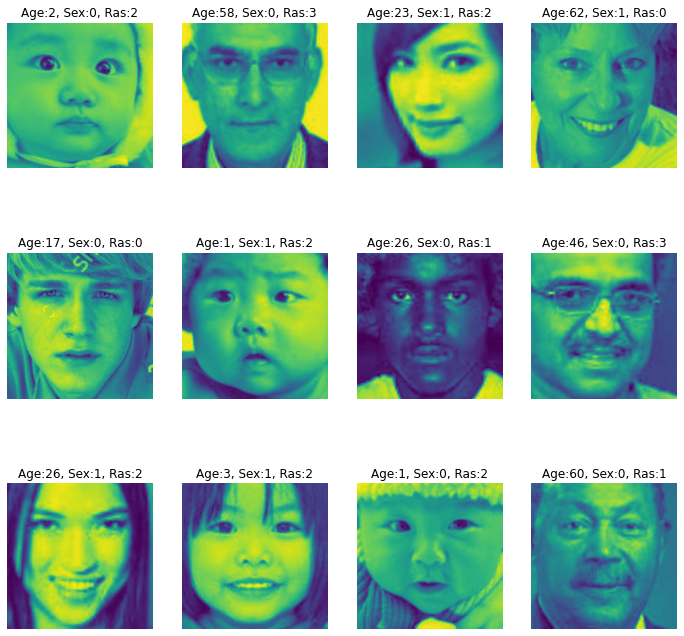

In [30]:
random_sample(df)

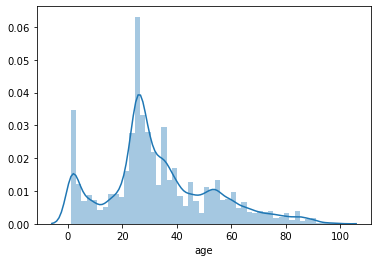

In [32]:
# Распределение в датасете по возрасту
warnings.simplefilter('ignore')
sns.distplot(df['age']);

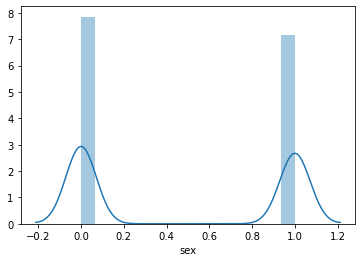

In [33]:
# Распределение в датасете по полу
warnings.simplefilter('ignore')
sns.distplot(df['sex']);

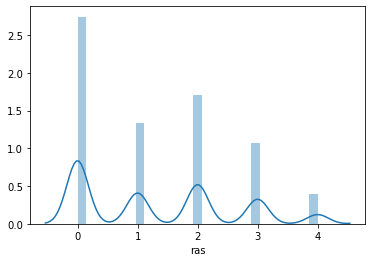

In [34]:
# Распределение в датасете по расе
warnings.simplefilter('ignore')
sns.distplot(df['ras']);

In [35]:
# Для бизнес-среды РФ релевантными будут результаты
# полученные на выборке: "Ras": 0, "Age": 22 - 45
main_df = df[
    (df['age'] > 22) &\
    (df['age'] < 45) &\
    (df['ras'] == 0)
]

In [36]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4029 entries, 0 to 23696
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   addr    4029 non-null   object
 1   age     4029 non-null   int64 
 2   sex     4029 non-null   int64 
 3   ras     4029 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 157.4+ KB


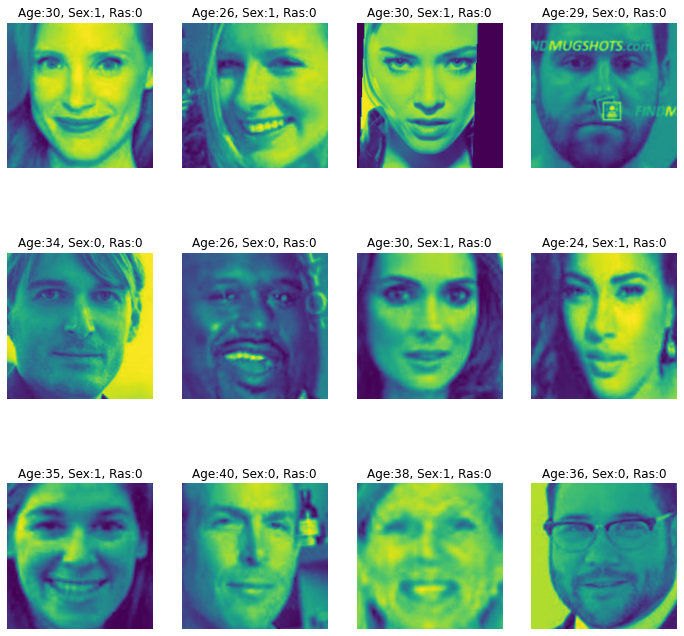

In [38]:
# Посмотрим на полученные изображения
random_sample(main_df)

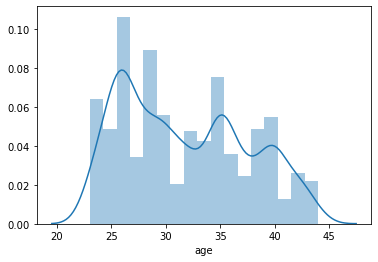

In [39]:
# Распределение в основном датасете по возрасту
warnings.simplefilter('ignore')
sns.distplot(main_df['age']);

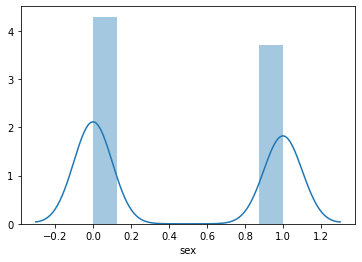

In [41]:
# Распределение в основном датасете по полу
warnings.simplefilter('ignore')
sns.distplot(main_df['sex']);

In [42]:
# Понизим размерность наших изображений методом PSA

def psa_pic(addr: str) -> np.array:
    """Проецирует матрицу изображения
    на одну ось пространства (вектор)
    """
    img = cv2.imread(addr, cv2.IMREAD_GRAYSCALE)
    covmat = np.cov(img)
    _, vecs = np.linalg.eig(covmat)
    v = -vecs[:, 1]
    vec = np.dot(v, img)
    return vec

In [43]:
main_df['psa'] = main_df['addr'].apply(psa_pic)
main_df.head()

addr  age  sex  ras  \
0   UTKFace//30_1_0_20170117091918162.jpg.chip.jpg   30    1    0   
4   UTKFace//26_1_0_20170116164040161.jpg.chip.jpg   26    1    0   
12  UTKFace//26_1_0_20170113000527784.jpg.chip.jpg   26    1    0   
14  UTKFace//35_1_0_20170104181325301.jpg.chip.jpg   35    1    0   
15  UTKFace//25_1_0_20170103180911281.jpg.chip.jpg   25    1    0   

                                                  psa  
0   [18.30439615766535, 28.03453202620385, 39.4828...  
4   [738.4920091014819, 740.0267920810584, 740.991...  
12  [36.02320268681896, 34.13183046473358, 31.8386...  
14  [-0.884522382971312, 10.628809984332705, -19.7...  
15  [103.92373787435349, 103.92127232767051, 98.99...

In [44]:
# Посмотрим на характеристики эмбеддингов
for indx, row in main_df.iterrows():
    if indx < 55:
        print(f"Размерность: {row['psa'].shape}")

Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)
Размерность: (200,)


## Кластеризация изображений

### На основании Евклидова расстояния

In [45]:
# В первом подходе посмотрим на результаты
# кластеризации, в основе которого - Евклидово расстояние

def euclid_dist(vec1: np.array, vec2: np.array) -> float:
    """Возвращает Евклидово растояние между векторами
    в евклидовом пространстве
    """
    dist: float = np.linalg.norm(vec1 - vec2)
    return dist

In [105]:
# Расстояние между одинаковыми эмбеддингами
euclid_dist(main_df['psa'][0], main_df['psa'][0])

0.0

In [108]:
# Расстояние между одинаковыми эмбеддингами
euclid_dist(main_df['psa'][0], main_df['psa'][14])

7415.383977824398

In [85]:
def classifier(data: pd.DataFrame,
               meth: str, lim: int, num_classes: int=4) -> dict:
    """Кластеризует изображения основываясь
    на расстоянии между векторами
    
        meth:
            euclid - для расчета евклидова расстояния
            kl - для расчета дивергенции Кульбака-Лейблера
        lim - расстояние отнесения к классу
        num_classes - количество циклов перебора выборки (классов)
    """
    # Итоговый сроварь с признаками класса и id
    result: dict = {}
    # Список id, попавших в какой-либо класс
    temp_id: list = []
    lbl = 0
    
    for x in range(num_classes):
        # Временный список для id classes
        temp: list = []
        # Выбор случайного id изображения
        random_index: int = random.choice(data.index)
        print(f'Случайный индекс класса {lbl}:', 
              random_index)
        
        for i in data.index:
            if meth == 'euclid':
                dist = euclid_dist(data['psa'][random_index],
                                   data['psa'][i])
            elif meth == 'kl':
                dist = kl(data['psa'][random_index],
                          data['psa'][i])
                    
            if dist < lim and i not in temp_id:
                temp.append(i)
                temp_id.append(i)

        result.update({x: temp})
        lbl += 1
    
    return result

In [125]:
euclid_clusters = classifier(main_df, 'euclid', 3500, 6)

Случайный индекс класса 0: 18095
Случайный индекс класса 1: 7642
Случайный индекс класса 2: 5678
Случайный индекс класса 3: 3022
Случайный индекс класса 4: 18071
Случайный индекс класса 5: 16008


In [126]:
# Ключи словаря
euclid_clusters.keys()

dict_keys([0, 1, 2, 3, 4, 5])

Выборка Евк: 0, Размер выборки: 97


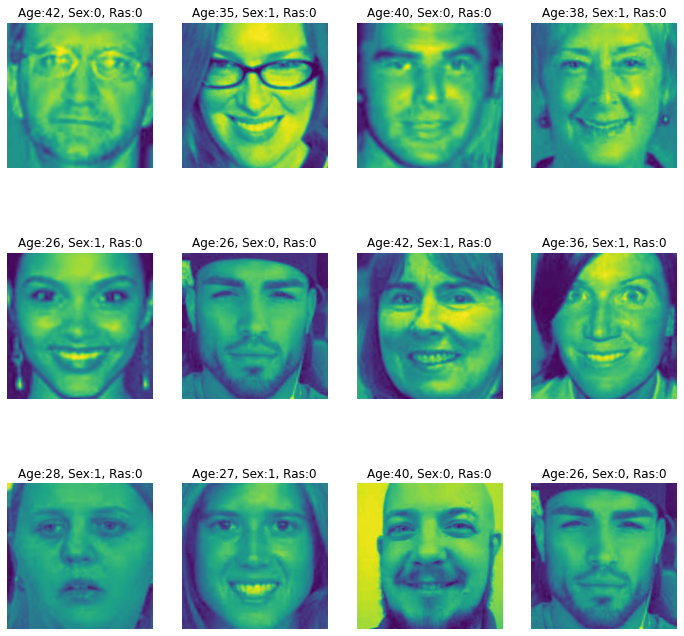

In [127]:
# Посмотрим на полученные изображения
# по различным классам
show_group(0, euclid_clusters, 'Евк')

Выборка Евк: 1, Размер выборки: 112


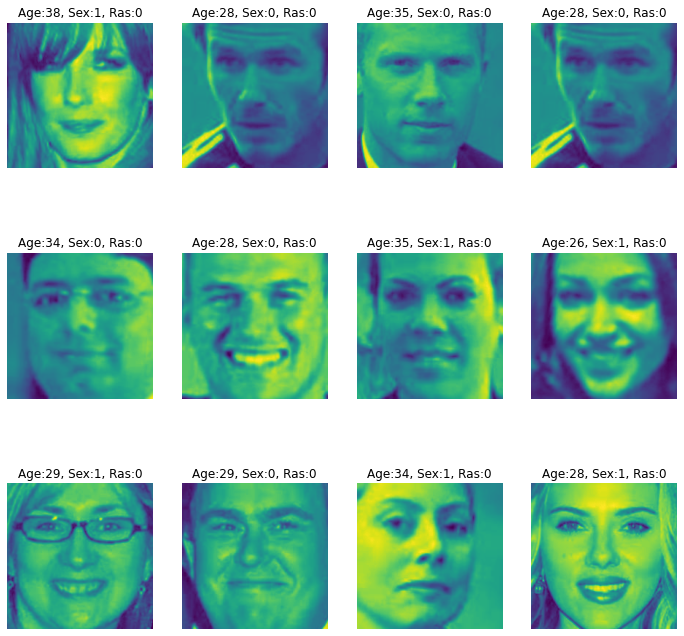

In [128]:
show_group(1, euclid_clusters, 'Евк')

Выборка Евк: 2, Размер выборки: 18


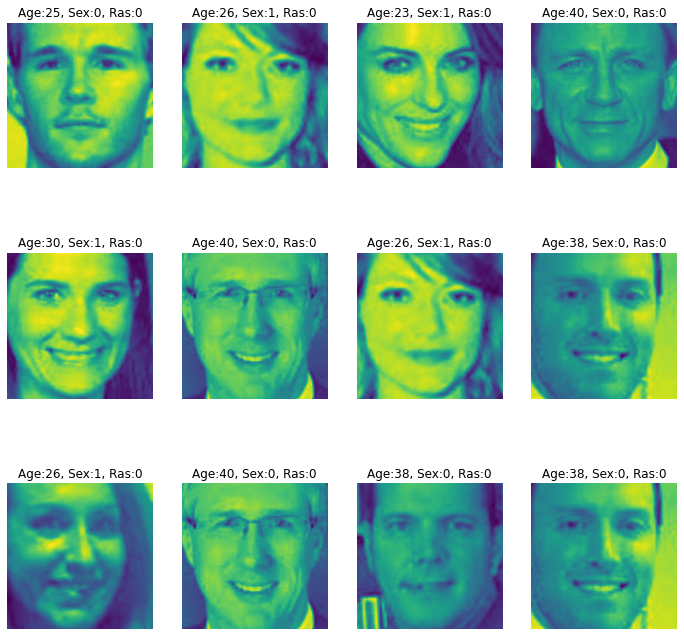

In [129]:
show_group(2, euclid_clusters, 'Евк')

Выборка Евк: 3, Размер выборки: 38


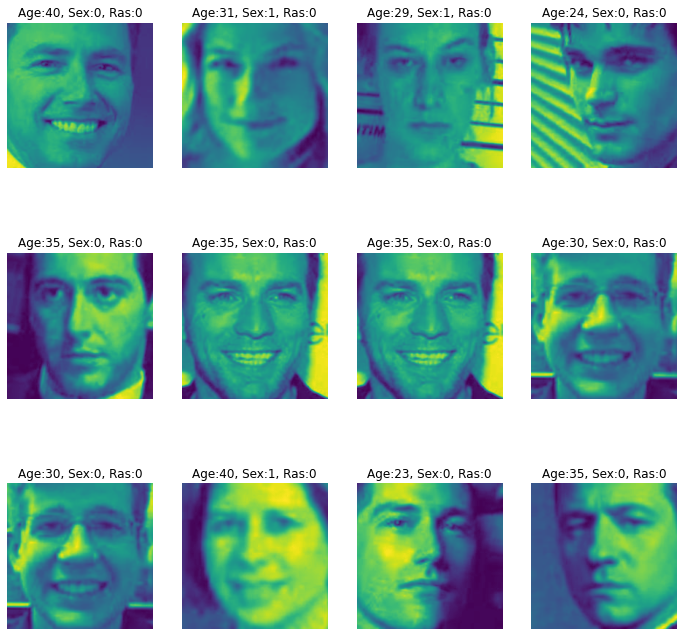

In [130]:
show_group(3, euclid_clusters, 'Евк')

Сходства изображений заметны, однако попробуем учесть и семантику изображений

### На основании расстояния Кульбака Лейблера

In [94]:
main_df.head()

addr  age  sex  ras  \
0   UTKFace//30_1_0_20170117091918162.jpg.chip.jpg   30    1    0   
4   UTKFace//26_1_0_20170116164040161.jpg.chip.jpg   26    1    0   
12  UTKFace//26_1_0_20170113000527784.jpg.chip.jpg   26    1    0   
14  UTKFace//35_1_0_20170104181325301.jpg.chip.jpg   35    1    0   
15  UTKFace//25_1_0_20170103180911281.jpg.chip.jpg   25    1    0   

                                                  psa  
0   [18.30439615766535, 28.03453202620385, 39.4828...  
4   [738.4920091014819, 740.0267920810584, 740.991...  
12  [36.02320268681896, 34.13183046473358, 31.8386...  
14  [-0.884522382971312, 10.628809984332705, -19.7...  
15  [103.92373787435349, 103.92127232767051, 98.99...

In [95]:
def kl(p: np.array, q: np.array) -> float:
    """Возвращает KL дивергенцию (KLD) между 
    каждой из пар эмбеддингов
    """
    # Для начала, нормализуем вектора
    p = (p - p.min()) / (p.max() - p.min()) + 1 * 10**-10
    q = (q - q.min()) / (q.max() - q.min()) + 1 * 10**-10
    
    dist = np.sum(
        np.where(
            p != 0, p * np.log(p / q), 0
        )
    )
    return dist

In [109]:
# Расстояние между одинаковыми эмбеддингами
kl(main_df['psa'][0], main_df['psa'][0])

0.0

In [111]:
# Расстояние между одинаковыми эмбеддингами
kl(main_df['psa'][0], main_df['psa'][14])

202.171840531216

In [131]:
kl_clusters = classifier(main_df, 'kl', 20, 6)

Случайный индекс класса 0: 10321
Случайный индекс класса 1: 5380
Случайный индекс класса 2: 3041
Случайный индекс класса 3: 4606
Случайный индекс класса 4: 5767
Случайный индекс класса 5: 3396


Выборка KL: 0, Размер выборки: 186


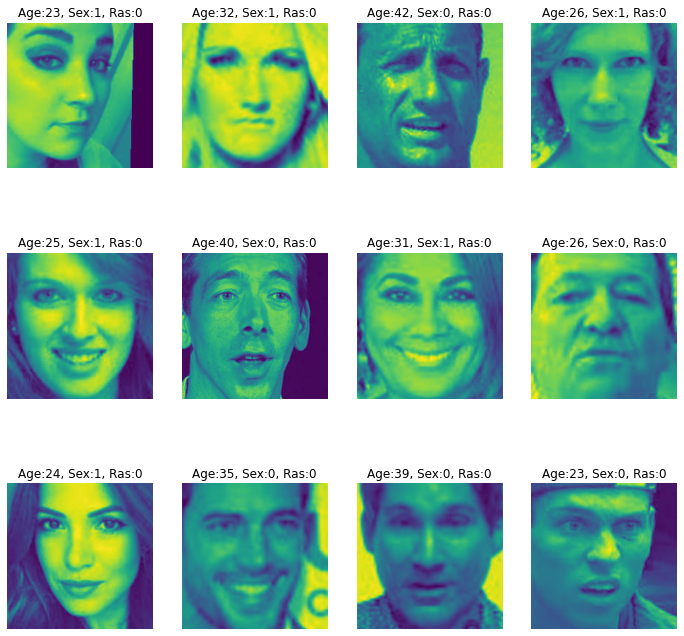

In [139]:
show_group(0, kl_clusters, 'KL')

Выборка KL: 1, Размер выборки: 1423


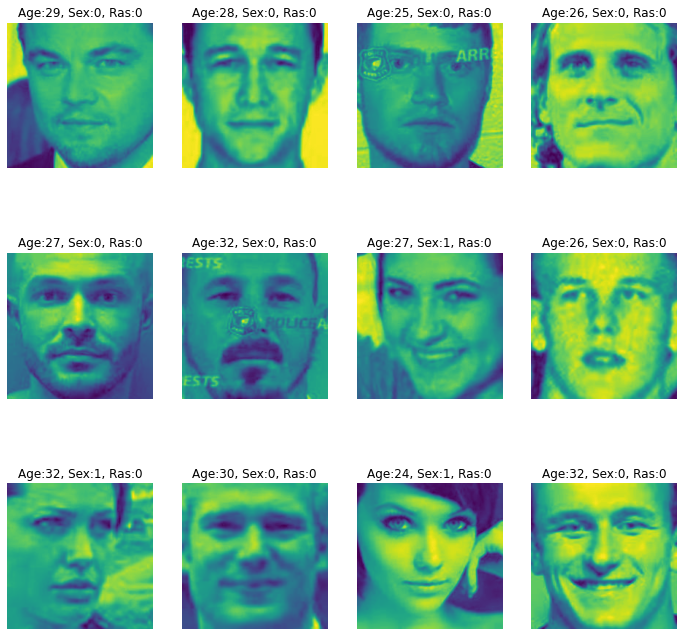

In [140]:
show_group(1, kl_clusters, 'KL')

Выборка KL: 2, Размер выборки: 80


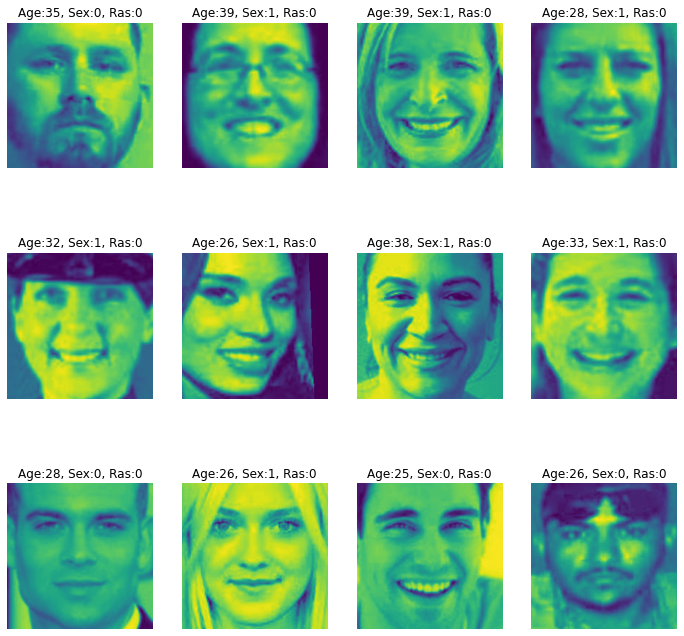

In [141]:
show_group(2, kl_clusters, 'KL')

Выборка KL: 3, Размер выборки: 109


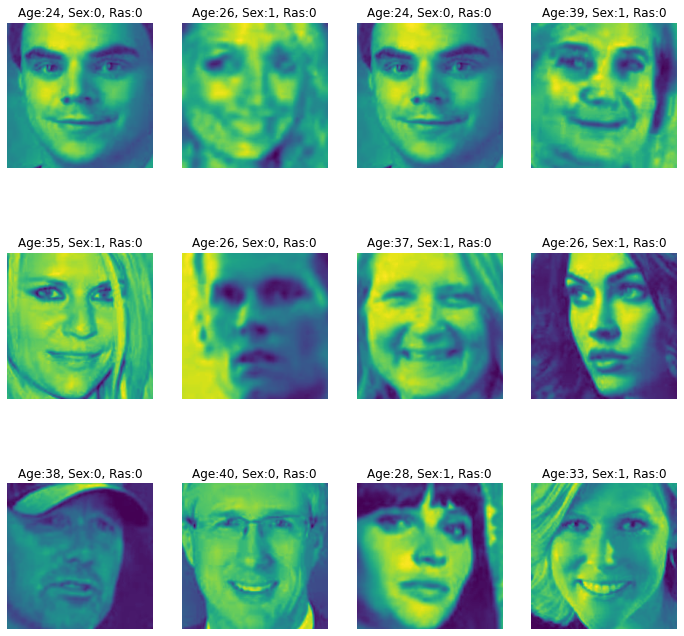

In [142]:
show_group(3, kl_clusters, 'KL')

Выборка KL: 4, Размер выборки: 125


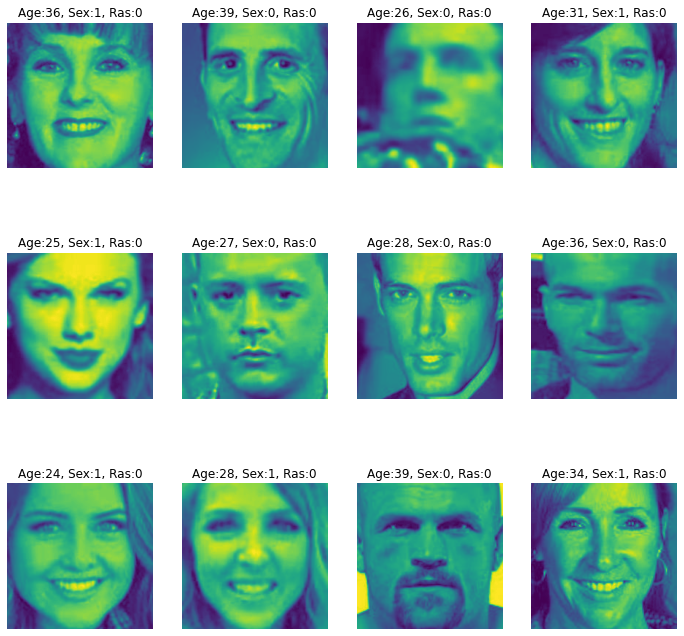

In [143]:
show_group(4, kl_clusters, 'KL')

# Источники

[[1] Кластеризация изображений лиц / В.Б. Немеровский, А.К. Стоянов ](https://drive.google.com/file/d/1WX_EQHQVgL14NVVOffHpDuvDxxbSMpI8/view?usp=sharing)

[[2] Расстояние Кульбака — Лейблера / Медиум](https://medium.com/@congyuzhou/дивергенция-кульбака-лейблера-431fa749fddb)

[[3] Препарируем t-SNE / Хабр ](https://habr.com/ru/post/267041/)

[[4] t-SNE - алгоритм для кластеризации изображений / GitHub](https://github.com/aviolante/sas-python-work/blob/master/tSneExampleBlogPost.ipynb)